In [1]:
# importing libs
import numpy as np
%matplotlib inline 
import tensorflow as tf
from keras.layers import Input, Dense, GaussianNoise
from keras.models import Model
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
import random as rn

Using TensorFlow backend.


In [2]:
# defining parameters
M = 16 
k = np.log2(M)
k = int(k)
print ('M:',M,'k:',k)

M: 16 k: 4


In [3]:
#generating data of size N
N = 10000
label = np.random.randint(M,size=N)

In [4]:
# creating one hot encoded vectors
data = []
for i in label:
    temp = np.zeros(M)
    temp[i] = 1
    data.append(temp)

In [5]:
data = np.array(data)
print (data.shape)

(10000, 16)


In [39]:
temp_check = [17,23,45,67,89,96,72,250,350]
for i in temp_check:
    print(label[i],data[i])

11 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
6 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
4 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
5 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
2 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
12 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
13 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
14 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
14 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]


In [6]:
R = 4/7
n_channel = 7
print (int(k/R))
input_signal = Input(shape=(M,))
encoded = Dense(M, activation='relu')(input_signal)
encoded1 = Dense(n_channel, activation='linear')(encoded)
encoded2 = BatchNormalization()(encoded1)

EbNo_train = 5.01187 #  coverted 7 db of EbNo
encoded3 = GaussianNoise(np.sqrt(1/(2*R*EbNo_train)))(encoded2)

decoded = Dense(M, activation='relu')(encoded3)
decoded1 = Dense(M, activation='softmax')(decoded)

autoencoder = Model(input_signal, decoded1)
#sgd = SGD(lr=0.001)
autoencoder.compile(optimizer='adam', loss='categorical_crossentropy')

7


In [7]:
print (autoencoder.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 119       
_________________________________________________________________
batch_normalization_1 (Batch (None, 7)                 28        
_________________________________________________________________
gaussian_noise_1 (GaussianNo (None, 7)                 0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
Total para

In [8]:
N_val = 1500
val_label = np.random.randint(M,size=N_val)
val_data = []
for i in val_label:
    temp = np.zeros(M)
    temp[i] = 1
    val_data.append(temp)
val_data = np.array(val_data)

In [9]:
autoencoder.fit(data, data,
                epochs=17,
                batch_size=300,
                validation_data=(val_data, val_data))

Train on 10000 samples, validate on 1500 samples
Epoch 1/17
10000/10000 [==============================] - 3s 299us/step - loss: 2.5890 - val_loss: 2.2992
Epoch 2/17
10000/10000 [==============================] - 0s 7us/step - loss: 2.1037 - val_loss: 1.8573
Epoch 3/17
10000/10000 [==============================] - 0s 7us/step - loss: 1.6787 - val_loss: 1.4446
Epoch 4/17
10000/10000 [==============================] - 0s 8us/step - loss: 1.3180 - val_loss: 1.0488
Epoch 5/17
10000/10000 [==============================] - 0s 7us/step - loss: 0.9771 - val_loss: 0.6997
Epoch 6/17
10000/10000 [==============================] - 0s 7us/step - loss: 0.6819 - val_loss: 0.4398
Epoch 7/17
10000/10000 [==============================] - 0s 9us/step - loss: 0.4620 - val_loss: 0.2813
Epoch 8/17
10000/10000 [==============================] - 0s 8us/step - loss: 0.3123 - val_loss: 0.1756
Epoch 9/17
10000/10000 [==============================] - 0s 8us/step - loss: 0.2113 - val_loss: 0.1113
Epoch 10/17
1

In [10]:
from keras.models import load_model
#autoencoder.save('4_7_symbol_autoencoder_v_best.model')

In [45]:
#autoencoder_loaded = load_model('4_7_symbol_autoencoder_v_best.model')

In [11]:
encoder = Model(input_signal, encoded2)

In [12]:
encoded_input = Input(shape=(n_channel,))

deco = autoencoder.layers[-2](encoded_input)
deco = autoencoder.layers[-1](deco)
# create the decoder model
decoder = Model(encoded_input, deco)

In [13]:
N = 45000
test_label = np.random.randint(M,size=N)
test_data = []

for i in test_label:
    temp = np.zeros(M)
    temp[i] = 1
    test_data.append(temp)
    
test_data = np.array(test_data)

In [14]:
temp_test = 6
print (test_data[temp_test][test_label[temp_test]],test_label[temp_test])

1.0 12


In [15]:
autoencoder

In [16]:
def frange(x, y, jump):
  while x < y:
    yield x
    x += jump

In [17]:
EbNodB_range = list(frange(-4,8.5,0.5))
ber = [None]*len(EbNodB_range)
for n in range(0,len(EbNodB_range)):
    EbNo=10.0**(EbNodB_range[n]/10.0)
    noise_std = np.sqrt(1/(2*R*EbNo))
    noise_mean = 0
    no_errors = 0
    nn = N
    noise = noise_std * np.random.randn(nn,n_channel)
    encoded_signal = encoder.predict(test_data) 
    final_signal = encoded_signal + noise
    pred_final_signal =  decoder.predict(final_signal)
    pred_output = np.argmax(pred_final_signal,axis=1)
    no_errors = (pred_output != test_label)
    no_errors =  no_errors.astype(int).sum()
    ber[n] = no_errors / nn 
    print ('SNR:',EbNodB_range[n],'BER:',ber[n])

SNR: -4 BER: 0.3113111111111111
SNR: -3.5 BER: 0.2763111111111111
SNR: -3.0 BER: 0.23602222222222222
SNR: -2.5 BER: 0.2046
SNR: -2.0 BER: 0.16655555555555557
SNR: -1.5 BER: 0.13644444444444445
SNR: -1.0 BER: 0.10691111111111111
SNR: -0.5 BER: 0.0846
SNR: 0.0 BER: 0.0626
SNR: 0.5 BER: 0.04393333333333333
SNR: 1.0 BER: 0.031488888888888886
SNR: 1.5 BER: 0.020577777777777778
SNR: 2.0 BER: 0.014066666666666667
SNR: 2.5 BER: 0.008155555555555555
SNR: 3.0 BER: 0.004844444444444445
SNR: 3.5 BER: 0.002688888888888889
SNR: 4.0 BER: 0.001288888888888889
SNR: 4.5 BER: 0.0006
SNR: 5.0 BER: 0.00024444444444444443
SNR: 5.5 BER: 0.0002
SNR: 6.0 BER: 4.4444444444444447e-05
SNR: 6.5 BER: 2.2222222222222223e-05
SNR: 7.0 BER: 0.0
SNR: 7.5 BER: 0.0
SNR: 8.0 BER: 0.0


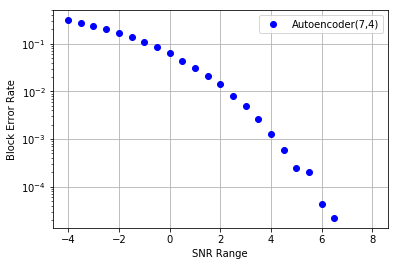

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(EbNodB_range, ber, 'bo',label='Autoencoder(7,4)')
#plt.plot(list(EbNodB_range), ber_theory, 'ro-',label='BPSK BER')
plt.yscale('log')
plt.xlabel('SNR Range')
plt.ylabel('Block Error Rate')
plt.grid()
plt.legend(loc='upper right',ncol = 1)

In [21]:
plt.savefig('AutoEncoder_7_4_BER_matplotlib')
plt.show()

<Figure size 432x288 with 0 Axes>